
<h1><font color='#004b87'><center>Data Programming</center></font></h1>
    <h3><center>Problem Set # 3
   </center></h3>
        <h4><left>Submitted by: Jijo John Joseph<left></h4>
        <h4><left>Student ID: 200521777<left></h4>
        <h4><left>Big Data Analytics <left></h4>

# Problem Set 3- Introduction

This problem set is based on lectures 9 and 10. For a complete list of topics please consult page 2 of the course syllabus. Please consult the “Instructions for Problem Set Submissions” document under course information before submitting your 
assignment.


# Question 1:
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and 
materials.

Occupations

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called users

Step 4. Discover what is the mean age per occupation

Step 5. Discover the Male ratio per occupation and sort it from the most to the least

Step 6. For each occupation, calculate the minimum and maximum ages

Step 7. For each combination of occupation and sex, calculate the mean age

Step 8. For each occupation present the percentage of women and men

Step 1. Import the necessary libraries

In [14]:
import numpy as np
import pandas as pd

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called users

In [15]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', delimiter='|')
print(users)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


Step 4. Discover what is the mean age per occupation

In [16]:
#dataframe is created for the data imported using pandas
df = pd.DataFrame(users)
#Find the mean age and group by occupation.
mean = df.groupby('occupation')['age'].mean()
# Referece : https://stackabuse.com/calculating-mean-median-and-mode-in-python/
#print mean values and occupation
print(mean)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [17]:
#To find the number of male and group by occupation
maleratio= df[df['gender']=='M'].groupby('occupation')['gender'].count()


In [18]:
#To find the ratio with by dividing the count of men by total population
ratio = maleratio / df.groupby('occupation')['gender'].count()
#sort the values in descending
sortedvalues= ratio.sort_values(ascending=False)
#Print the values
print (sortedvalues)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


Step 6. For each occupation, calculate the minimum and maximum ages

In [19]:
#Reference:https://stackoverflow.com/questions/52471331/pandas-groupby-with-agg-min-max-date
#To find the min and max using aggregate function
maxminage = df.groupby('occupation').agg({'age':['min', 'max']})
#Print the result
print(maxminage)

              age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60


Step 7. For each combination of occupation and sex, calculate the mean age

In [27]:
#To find the mean age for male and female corresponding to each occupation
meanage = df.groupby(['occupation','gender'])['age'].mean()

#Print the results
print(meanage)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

Step 8. For each occupation present the percentage of women and men

In [35]:
# To calculate the count of male and female with occupation
gendercount = df.groupby(['occupation', 'gender'])['gender'].count()

# TO calculate the count corresponding to each occupation
countoccupation = df.groupby('occupation')['gender'].count()

# To calculate the percentage male and female based on occupation
percent = (gendercount / countoccupation) * 100

#Print the result
print(percent)

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

#  Question 2:

Euro Teams

Step 1. Import the necessary libraries

Step 2. Import the dataset from this address

Step 3. Assign it to a variable called euro12

Step 4. Select only the Goal column

Step 5. How many team participated in the Euro2012?

Step 6. What is the number of columns in the dataset?

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them 
to a dataframe called discipline

Step 8. Sort the teams by Red Cards, then to Yellow Cards

Step 9. Calculate the mean Yellow Cards given per Team

Step 10. Filter teams that scored more than 6 goals 

Step 11. Select the teams that start with G

Step 12. Select the first 7 columns

Step 13. Select all columns except the last 3

Step 14. Present only the Shooting Accuracy from England, Italy and Russia


Answers:
Step 1. Import the necessary libraries

In [2]:
#Importing libraries
import numpy as np
import pandas as pd

Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12

In [3]:
# Creating variable euro12 and reading the dataset from the link given
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

Step 4. Select only the Goal column

In [4]:
#dataframe is created for the data imported using pandas
df = pd.DataFrame(euro12)
#Display Goals column
Goals=df[['Goals']]
print(Goals)

    Goals
0       4
1       4
2       4
3       5
4       3
5      10
6       5
7       6
8       2
9       2
10      6
11      1
12      5
13     12
14      5
15      2


Step 5. How many team participated in the Euro2012?

In [5]:
# count funcion to find the number of teams
participate = df['Team'].count()

#Print the number of teams 
print(participate)

16


Step 6. What is the number of columns in the dataset?

In [6]:
#Reference:https://www.geeksforgeeks.org/count-number-of-columns-of-a-pandas-dataframe/
#Print the number of columns in the dataset using shape
col = df.shape[1]
print(col)

35


Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [7]:
#Print the df stored in a variable called discipline
discipline = df[['Team', 'Yellow Cards', 'Red Cards']]

print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [8]:
#Sorting the Teams with Yellow and red cards using the command sort_values
cards= df[['Team', 'Red Cards', 'Yellow Cards']].sort_values(by=['Red Cards','Yellow Cards'])
#Printing the result
print(cards)

                   Team  Red Cards  Yellow Cards
2               Denmark          0             4
5               Germany          0             4
3               England          0             5
8           Netherlands          0             5
15              Ukraine          0             5
4                France          0             6
12               Russia          0             6
1        Czech Republic          0             7
14               Sweden          0             7
0               Croatia          0             9
13                Spain          0            11
10             Portugal          0            12
7                 Italy          0            16
11  Republic of Ireland          1             6
9                Poland          1             7
6                Greece          1             9


Step 9. Calculate the mean Yellow Cards given per Team


In [14]:
#Calculating mean of yellow cards and storing it in variable YellowCard
YellowCard=df['Yellow Cards'].mean()
print(YellowCard)

7.4375


Step 10. Filter teams that scored more than 6 goals

In [15]:
# loc function is used to select the data with the condition of more than 6 goals and storig it in the variable goal
goal = df[['Team','Goals']].loc[euro12['Goals'] > 6 ]
#Printing the result
print (goal)

       Team  Goals
5   Germany     10
13    Spain     12


Step 11. Select the teams that start with G

In [16]:
#Reference https://www.w3schools.com/python/ref_string_startswith.asp
#Using startswith function, we are storing the value in the variable SW
SW= df[df['Team'].str.startswith('G')]
#Prints only the Team name and not the whole data for the team
print (SW['Team'])

5    Germany
6     Greece
Name: Team, dtype: object


Step 12. Select the first 7 columns

In [17]:
#Reference : https://statisticsglobe.com/extract-first-last-n-columns-from-pandas-dataframe-python#:~:text=To%20accomplish%20this%2C%20we%20can%20use%20the%20iloc,Select%20first%20columns%20print%28data_first_n%29%20%23%20Print%20first%20columns
# Using iloc function to get the first 7 columns.
col= df.iloc[:, :7]
#Printing result
print(col)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

Step 13. Select all columns except the last 3

Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [20]:
#Reference:https://stackoverflow.com/questions/53079487/pandas-what-is-the-difference-between-isin-and-str-contains

# To Filter the countries using isin function
accu_team = ['England', 'Italy', 'Russia']
data = df[df['Team'].isin(selected_countries)]

# To get the shooting accuracy of the filtered teams
shoot_accu = data[['Team', 'Shooting Accuracy']]

#Print the result
print(shoot_accu)

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


#  Question 3:
Question 3
Housing

Step 1. Import the necessary libraries

Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000

Step 3. Create a DataFrame by joinning the Series by column

Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

Step 5. Create a one column DataFrame with the values of the 3 Series and assign it 
to 'bigcolumn'

Step 6. Ops it seems it is going only until index 99. Is it true?

Step 7. Reindex the DataFrame so it goes from 0 to 299

Step 1. Import the necessary libraries

In [99]:
import pandas as pd
import numpy as np

Step 2. Create 3 differents Series, each of length 100, as follows: • The first a random number from 1 to 4 • The second a random number from 1 to 3 • The third a random number from 10,000 to 30,000

In [100]:
#Reference : https://www.w3schools.com/python/ref_random_randint.asp
# using randint to return integer from specified range
randnum_1 = pd.Series(np.random.randint(1, 5, size=100))

randnum_2 = pd.Series(np.random.randint(1, 4, size=100))

randnum_3 = pd.Series(np.random.randint(10000, 30001, size=100))

print(randnum_1)
print(randnum_2)
print(randnum_3)

0     3
1     2
2     2
3     4
4     4
     ..
95    1
96    3
97    1
98    2
99    4
Length: 100, dtype: int32
0     3
1     3
2     1
3     2
4     2
     ..
95    1
96    2
97    3
98    1
99    3
Length: 100, dtype: int32
0     25120
1     18252
2     11131
3     26642
4     19951
      ...  
95    20644
96    19481
97    26999
98    17963
99    25688
Length: 100, dtype: int32


Step 3. Create a DataFrame by joining the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [101]:
#Reference :https://www.golinuxcloud.com/pandas-concat-function/#:~:text=%23%20import%20pandas%20import%20pandas%20%23%20creating%20the,concate%20two%20series%20print%20%28pandas.concat%20%28%5Bdata1%2C%20data2%5D%2Cignore_index%3D%20False%29%29
# Creating a DataFrame by joining the Series by column
df = pd.concat([randnum_1, randnum_2, randnum_3], axis=1)

# Assign column names to the DataFrame
df.columns = ['Series 1', 'Series 2', 'Series 3']

# Print the DataFrame
df

,Series 1,Series 2,Series 3
0,3,3,25120
1,2,3,18252
2,2,1,11131
3,4,2,26642
4,4,2,19951
...,...,...,...
95,1,1,20644
96,3,2,19481
97,1,3,26999
98,2,1,17963


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [102]:
#Reference:https://www.geeksforgeeks.org/python-pandas-dataframe-rename/
#Using the function rename to change the column name
field = df.rename(columns={"Series 1": "bedrs", "Series 2": "bathrs", "Series 3": "price_sqr_meter"})
#Print the column names
field

,bedrs,bathrs,price_sqr_meter
0,3,3,25120
1,2,3,18252
2,2,1,11131
3,4,2,26642
4,4,2,19951
...,...,...,...
95,1,1,20644
96,3,2,19481
97,1,3,26999
98,2,1,17963


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn

In [103]:
#Reference :https://www.w3schools.com/python/pandas/ref_df_astype.asp
#Using astype to apply operation over each value in the dataframe
column = field['bedrs'].astype(str) + field['bathrs'].astype(str) + field['price_sqr_meter'].astype(str)

column

0     3325120
1     2318252
2     2111131
3     4226642
4     4219951
       ...   
95    1120644
96    3219481
97    1326999
98    2117963
99    4325688
Length: 100, dtype: object

Step 6. Ops it seems it is going only until index 99. Is it true?

Yes, it is true. The index is going only till 99

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [104]:
#Reference: https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe
reindex = column.reindex(range(0, 300))

reindex

0      3325120
1      2318252
2      2111131
3      4226642
4      4219951
        ...   
295        NaN
296        NaN
297        NaN
298        NaN
299        NaN
Length: 300, dtype: object

# Question 4

Wind Statistics 

The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.

You should be able to perform all of these operations without using a for loop or other looping construct.

The data in 'wind.data' has the following format:

Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL 
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. 
The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.

Step 1. Import the necessary libraries

Step 2. Import the dataset from the attached file wind.txt

Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64.

Step 6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below.

Step 7. Compute how many non-missing values there are in total.

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.A single number for the entire dataset.

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the days.A different set of numbers for each location.

Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.A different set of numbers for each day.

Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.

Step 12. Downsample the record to a yearly frequency for each location.

Step 13. Downsample the record to a monthly frequency for each location.

Step 14. Downsample the record to a weekly frequency for each location.

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks


Step 1. Import the necessary libraries

In [3]:
import pandas as pd

Step 2. Import the dataset from the attached file wind.txt

In [4]:
#importing the file and displaying it
read= pd.read_csv('wind.txt', delimiter='\s+')

Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [5]:
#Renaming columns with rename functio
data= read.rename(columns={"Yr":"Year", "Mo":"Month", "Dy":"Day"})
#Printing the result
data

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [6]:
#Function to fix the year
def fix_year():
    data['Year'] += 1900 
#invoking the function
fix_year() 
#Printing the output
data

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64.

In [7]:
#Reference:https://stackoverflow.com/questions/40815238/convert-dataframe-index-to-datetime
#Converting argument to datatime
data.index = pd.to_datetime(pd.concat([data['Year'], data['Month'], data['Day']], axis=1)) 

# Dropping columns Year, Month & Day
data.drop(['Year','Month','Day'], axis=1, inplace=True) 

data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

Step 7. Compute how many non-missing values there are in total.

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.A single number for the entire dataset.

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days.A different set of numbers for each location.

Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.A different set of numbers for each day.

In [8]:
#Finding null values in the data
#Reference:https://www.geeksforgeeks.org/python-pandas-dataframe-isna/
nullvalues = data.isna().sum() 

nullvalues

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Step 7. Compute how many non-missing values there are in total.

In [9]:
# Finding nont null values

#Reference:https://www.geeksforgeeks.org/python-pandas-isnull-and-notnull/

notnullvalues = data.notnull().sum().sum()
notnullvalues

78857

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.A single number for the entire dataset.

In [10]:
# Finding mean windspeed using mean function
meanspeed = data.mean().mean() 

meanspeed

10.227982360836938

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days.A different set of numbers for each location.

In [11]:
#Creating a dataframe named loc_stats with the data having min , max, mean and standard deviation
loc_stats = pd.concat([data.min(), data.max(), data.mean(), data.std()], axis=1)
#Initially the column name would be 0, 1, 2 and 3. We rename it with Min, Max , Mean and Std
loc_stats.rename(columns={0:'Min', 1:'Max', 2:'Mean', 3:'Std'}, inplace=True) 
#Print the result
loc_stats

,Min,Max,Mean,Std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.A different set of numbers for each day.

In [12]:
#Creating a dataframe named day_stats with the data having min , max, mean and standard deviation for each day
day_stats = pd.concat([data.min(axis=1), data.max(axis=1), data.mean(axis=1), data.std(axis=1)], axis=1)

#Initially the column name would be 0, 1, 2 and 3. We rename it with Min, Max , Mean and Std
day_stats.rename(columns={0:'Min',1:'Max',2:'Mean',3:'Std'}, inplace=True)

day_stats

,Min,Max,Mean,Std
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836
1978-12-30,9.13,28.79,15.367500,5.540437


Step 11. Find the average windspeed in January for each location.Treat January 1961 and January 1962 both as January.


In [13]:
#Using index on the column month which has one to find the mean using mean function
AvgSpeed = data[data.index.month == 1].mean()
#Printig the result
AvgSpeed

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

Step 12. Downsample the record to a yearly frequency for each location.

In [17]:
#Reference:https://stackoverflow.com/questions/54241091/python-downsample-using-resample-not-using-average-mean
#Reference 2: https://www.geeksforgeeks.org/python-pandas-dataframe-ffill/

#Using resample function and ffill to get the yearly frequency

yearlyfreq = data.resample('Y').ffill()
#Print the result
yearlyfreq

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-12-31,9.87,7.83,7.67,3.75,5.66,3.50,10.04,3.08,5.04,3.79,8.04,14.67
1962-12-31,22.67,16.88,28.67,14.12,19.75,17.08,27.79,25.21,19.83,17.79,25.46,37.63
1963-12-31,13.88,14.42,12.12,9.25,14.33,10.67,18.29,11.96,12.04,15.37,16.79,14.09
1964-12-31,16.33,19.25,13.37,10.08,17.04,12.54,19.83,13.79,12.67,15.04,21.37,23.58
1965-12-31,13.62,13.88,12.29,6.08,12.33,7.41,9.59,10.21,7.46,12.17,15.71,16.75
1966-12-31,13.00,11.46,10.13,6.34,11.87,7.50,13.50,8.46,11.00,10.04,17.29,22.46
1967-12-31,16.88,13.75,11.34,9.08,13.54,7.71,11.75,11.83,11.83,11.75,17.25,22.63
1968-12-31,9.13,2.13,7.38,2.50,4.04,0.50,6.83,2.54,3.54,5.50,5.71,12.42
1969-12-31,14.42,13.83,27.71,7.08,12.08,10.00,14.58,11.00,12.54,7.12,11.17,17.41
1970-12-31,8.38,0.37,9.59,2.62,1.75,0.08,4.83,2.13,2.54,1.17,3.67,7.21


Step 13. Downsample the record to a monthly frequency for each location.

In [18]:
#Using resample function and ffill to get the monthly frequency
monthfreq = data.resample('M').ffill()
#Print the result
monthfreq

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-31,24.21,19.55,16.71,11.96,14.42,10.46,14.88,8.21,10.50,9.96,12.42,13.92
1961-02-28,12.92,12.75,NaN,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17
1961-03-31,8.96,8.04,9.13,8.50,10.75,9.54,11.92,9.59,11.25,8.54,11.96,12.21
1961-04-30,11.67,11.00,9.54,5.54,9.42,5.79,5.09,8.25,6.96,6.25,12.21,8.75
1961-05-31,7.00,9.79,12.25,4.83,8.25,5.37,6.58,9.29,6.58,7.12,11.87,10.63
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,11.54,5.54,7.41,4.67,7.62,6.17,8.87,5.25,7.83,6.17,11.58,16.88
1978-09-30,26.75,15.63,16.54,13.37,17.58,13.13,16.92,13.79,13.46,13.79,18.91,31.88
1978-10-31,8.58,4.29,10.79,4.29,4.08,2.71,4.63,1.04,3.67,2.75,8.71,10.67
1978-11-30,15.34,4.54,14.75,3.50,4.54,4.96,7.50,2.42,4.96,3.75,4.92,11.50


Step 14. Downsample the record to a weekly frequency for each location.

In [20]:
#Using resample function and ffill to get the weekly frequency
weekfreq = data.resample('W').ffill()
#Print the result
weekfreq

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-15,12.04,9.67,11.75,2.37,7.38,3.13,2.50,6.83,4.75,5.63,7.54,6.75
1961-01-22,9.59,5.88,9.92,2.17,6.87,5.50,9.38,7.04,6.34,7.50,10.88,9.92
1961-01-29,NaN,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,21.21,21.34,17.75,11.58,16.75,14.46,17.46,15.29,15.79,17.50,21.42,25.75
1978-12-10,24.92,22.54,16.54,14.62,15.59,13.00,13.21,14.12,16.21,16.17,26.08,21.92
1978-12-17,9.87,3.21,8.04,2.21,3.04,0.54,2.46,1.46,1.29,2.67,5.00,9.08
1978-12-24,8.67,5.63,12.12,4.79,5.09,5.91,12.25,9.25,10.83,11.71,11.92,31.71


Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks

In [27]:
#Storing the values of first 52 from week frequency in variable eachweek
eachweek = weekfreq[:52]

#Reference: https://www.w3schools.com/python/pandas/ref_df_shape.asp

#To find the tuples in the dataframe
eachweek.shape[0]
#Creating a dataframe named weeklydata and finding mean, max , min and standard deviation
weeklydata = pd.concat([eachweek.min(), eachweek.max(), eachweek.mean(), eachweek.std()], axis=1)
#Renaming the column names with the corresponding names
weeklydata.rename(columns={0:'Min',1:'Max',2:'Mean',3:'Std'},inplace=True)
#Printing results
weeklydata

,Min,Max,Mean,Std
RPT,3.04,25.80,12.140000,5.360926
VAL,2.75,23.91,10.626538,4.782553
ROS,4.21,22.42,11.261731,4.714533
KIL,1.71,17.54,6.862549,3.743912
SHA,4.46,24.08,11.242745,4.770084
BIR,1.87,19.70,7.946346,3.906412
DUB,2.21,22.00,9.912353,4.695142
CLA,2.62,20.25,9.305385,4.022109
MUL,2.88,21.46,8.823077,4.181664
CLO,3.92,20.04,9.939615,4.077699


# Question 5


Step 1. Import the necessary libraries

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called chipo.

Step 4. See the first 10 entries

Step 5. What is the number of observations in the dataset?

Step 6. What is the number of columns in the dataset?

Step 7. Print the name of all the columns.

Step 8. How is the dataset indexed?

Step 9. Which was the most-ordered item?

Step 10. For the most-ordered item, how many items were ordered?

Step 11. What was the most ordered item in the choice_description column?

Step 12. How many items were orderd in total?

Step 13.

• Turn the item price into a float

• Check the item price type

• Create a lambda function and change the type of item price

• Check the item price type

Step 14. How much was the revenue for the period in the dataset?

Step 15. How many orders were made in the period?

Step 16. What is the average revenue amount per order?

Step 17. How many different items are sold?


Step 1. Import the necessary libraries

In [154]:
import pandas as pd

Step 2. Import the dataset from this address.

Step 3. Assign it to a variable called chipo.



In [204]:
#Importing the data from the URL
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', delimiter='\t')
df = pd.DataFrame(chipo)

Step 4. See the first 10 entries

In [159]:
# Displaying first 10 entries
chipo[:10] 

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [161]:
# To display the number of observations
observation = chipo.shape[0]
observation

4622

Step 6. What is the number of columns in the dataset?

In [164]:
#number of columns
col = chipo.shape[1]

col

5

Step 7. Print the name of all the columns.

In [167]:
#Reference: https://stackoverflow.com/questions/49188960/how-to-show-all-columns-names-on-a-large-pandas-dataframe
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?


In [177]:
#Reference:https://www.w3schools.com/python/pandas/ref_df_index.asp
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?

In [178]:
#Reference:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html
item = chipo.item_name.value_counts().head(1)
print(item)

Chicken Bowl    726
Name: item_name, dtype: int64


Step 10. For the most-ordered item, how many items were ordered?

In [185]:
#List of all the items in the item_name column
item_names=chipo.item_name.unique()
item_names

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [186]:
#Count of items
count = item_names.shape[0]

count

50

Step 11. What was the most ordered item in the choice_description column?

In [197]:
#List the description choice count and show the highest
decs_choice= chipo.choice_description.value_counts()

print("Most ordered item in choice description is ",decs_choice.head(1))

Most ordered item in choice description is  [Diet Coke]    134
Name: choice_description, dtype: int64


Step 12. How many items were orderd in total?

In [200]:
#Find the total ordered items
print("Number of items ordered in total are ",chipo.quantity.sum())

Number of items ordered in total are  4972


Step 13.

• Turn the item price into a float

• Check the item price type

• Create a lambda function and change the type of item price

• Check the item price type

In [230]:
#Reference: https://www.statology.org/pandas-convert-object-to-float/
chipo['item_price'] = chipo['item_price'].astype(float)
print(chipo['item_price'])


0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64


In [231]:
print("The type of item_price is",chipo['item_price'].dtype)

The type of item_price is float64


In [232]:
#Reference: https://stackoverflow.com/questions/51341532/want-to-use-a-lambda-function-to-change-the-type-of-a-cell-if-it-is-type-float
# Lambda function to the 'item_price' column
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))

# Printing result
print("The data type of item_price using lambda function is ",chipo['item_price'].dtype)

The data type of item_price using lambda function is  float64


Step 14. How much was the revenue for the period in the dataset?



In [236]:
#Find total
total = (chipo.quantity * chipo.item_price)

#Find the sum
revenue = total.sum()

print("Total revenue for the given period is", revenue)

Total revenue for the given period is 39237.02


Step 15. How many orders were made in the period?

In [239]:
#Finding the unique values in order_id
orders = chipo['order_id'].unique()
print(number_of_orders)

1834


Step 16. What is the average revenue amount per order?


In [243]:
sum_revenue = chipo.groupby('order_id')['item_price'].sum()

print(sum_revenue)

avg= sum_revenue.mean()

print("Average revenue amount is ", avg)

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64
Average revenue amount is  18.811428571428568


Step 17. How many different items are sold?

In [248]:
#Reference:https://www.w3schools.com/python/pandas/ref_df_nunique.asp
different_items= chipo['item_name'].nunique()
different_items

50

# # Question 6

Create a line plot showing the number of marriages and divorces per capita in the 
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [3]:
#Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt

#Reading data from the given link
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

df 

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


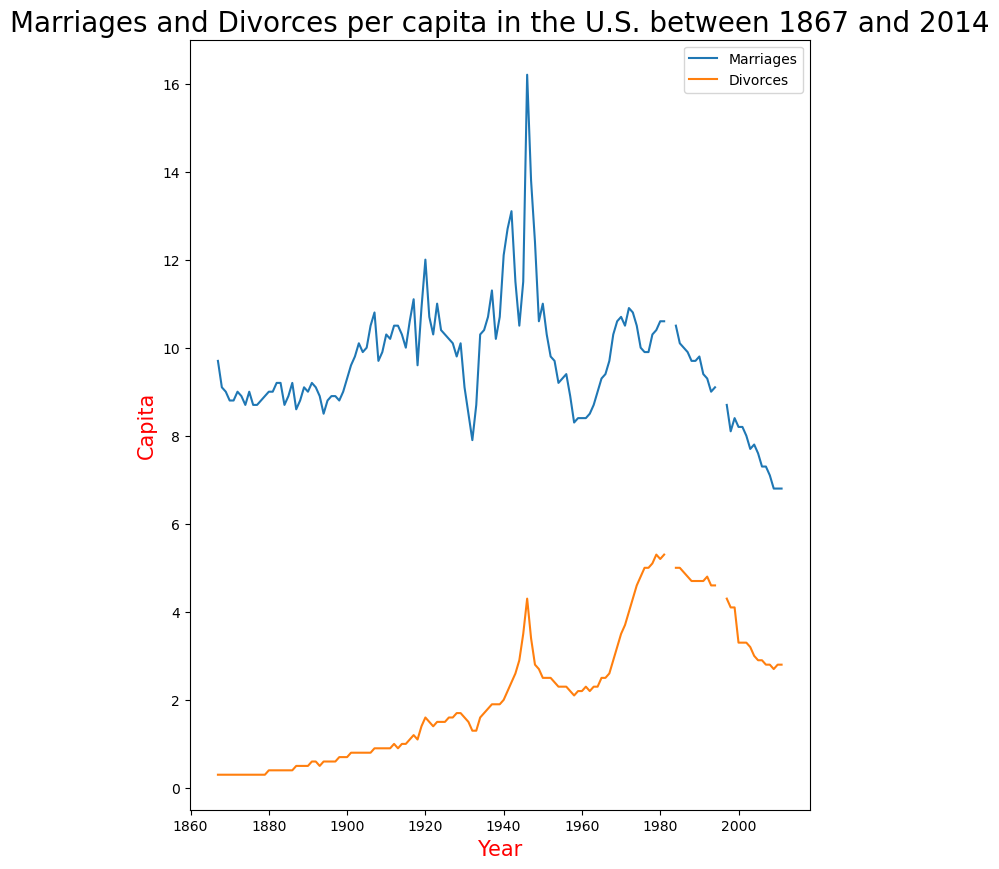

In [49]:
#Set size for the graph
plt.rcParams["figure.figsize"] = [8, 10] 

# To plot the data frame 
df.plot( 'Year', ['Marriages_per_1000','Divorces_per_1000'], label=['Marriages', 'Divorces'])

#To display the title with color and font size
plt.title('Marriages and Divorces per capita in the U.S. between 1867 and 2014', fontsize = 20)

#To display the x and y axis with labels (Color and font size)
plt.xlabel('Year', color = 'r', fontsize = 15)
plt.ylabel('Capita', color = 'r', fontsize = 15)

plt.show()

# Question 7

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!
 


In [33]:
#importing padns and matplotlib

import pandas as pd
import matplotlib.pyplot as plt

# Setting given years with Or operator
yearlisted = (df['Year'] == 1900) | (df['Year'] == 1950) | (df['Year'] == 2000) 

finalyear = df.loc[yearlisted, ['Year','Marriages_per_1000','Divorces_per_1000']]

finalyear

,Year,Marriages_per_1000,Divorces_per_1000
33,1900,9.3,0.7
83,1950,11.0,2.5
133,2000,8.2,3.3


C:\Users\jijoj\AppData\Local\Temp\ipykernel_24412\3223681954.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  resultgraph = finalyear[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()


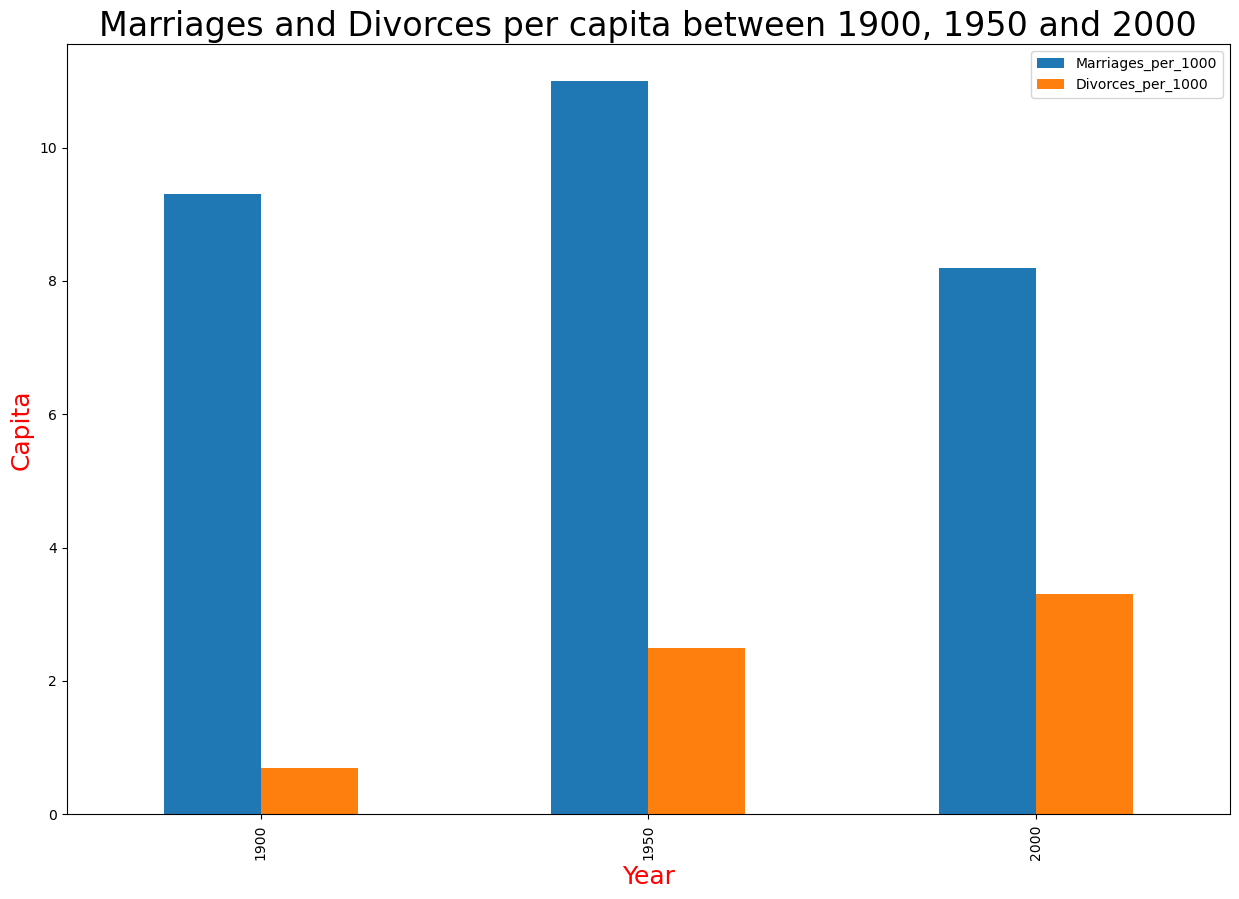

In [48]:
#Reference:https://www.geeksforgeeks.org/matplotlib-pyplot-xticks-in-python/
#Set size for the graph
plt.rcParams["figure.figsize"] = [15, 10]
#Plot the bar graph
resultgraph = finalyear[{'Marriages_per_1000','Divorces_per_1000'}].plot.bar()

#To display the title with color and font size
plt.title("Marriages and Divorces per capita between 1900, 1950 and 2000", fontsize = 24)

#To display the x and y axis with labels (Color and font size)
plt.xlabel('Year', color = 'r', fontsize = 18)
plt.ylabel('Capita', color = 'r', fontsize = 18)


#X axis label with the year shown in order
plt.xticks((0,1,2), ("1900", "1950", "2000"))
plt.show()

# Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

In [36]:
#Reference: https://infopython.com/how-to-plot-a-bar-chart-using-python/
#importing padns and matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#Reading dataset from excel
dataset = pd.read_csv('actor_kill_counts.csv')

#Sorting dataset by kill count
Count_sort= dataset.sort_values("Count")

Count_sort

,Actor,Count
9,Wesley Snipes,193
3,Clive Owen,194
5,Jet Li,201
6,Nicolas Cage,204
2,Clint Eastwood,207
8,Tomisaburo Wakayama,226
4,Dolph Lundgren,239
7,Sylvester Stallone,267
1,Chow Yun-Fat,295
0,Arnold Schwarzenegger,369


Text(0, 0.5, 'Actor')

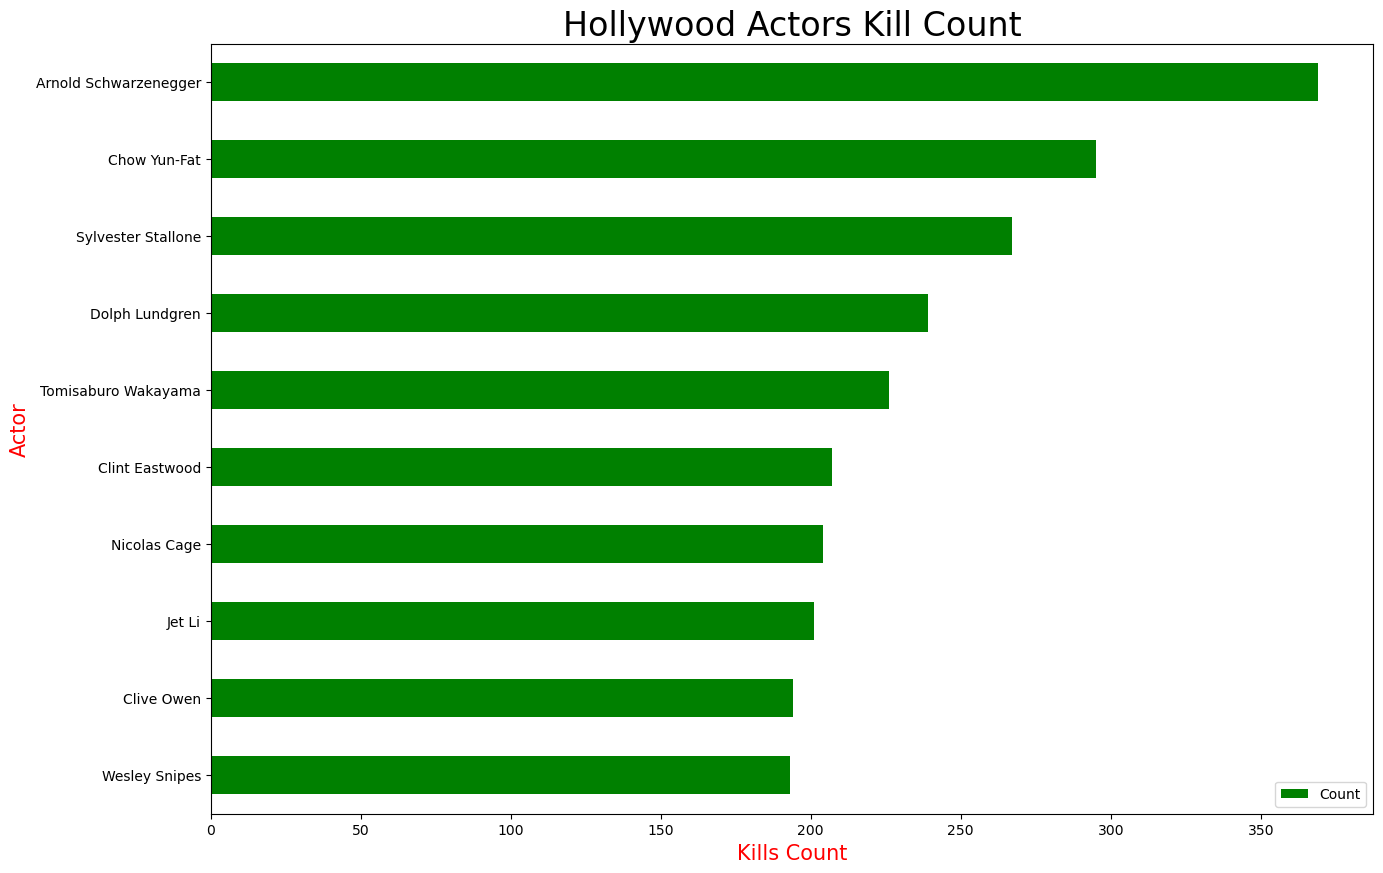

In [47]:
#Set size for the graph
plt.rcParams["figure.figsize"] = [15, 10]

#Plotting horizondal bar chart with x and y axis
Count_sort.plot.barh(x='Actor', y='Count',color='g')

# Chart Title
plt.title('Hollywood Actors Kill Count', fontsize=24)

#Labels for x and y axis
plt.xlabel('Kills Count', color = 'r', fontsize = 15)
plt.ylabel('Actor', color = 'r', fontsize = 15)

# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated.

Make sure that the pie chart is an even circle, labels the categories, and shows the 
percentage breakdown of the categories.

In [145]:
#Reference:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html
#importing matplotlib and pandas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#Reading dataset from link
df = pd.read_csv('roman-emperor-reigns.csv')

#Grouping by Cause of Death and taking count
deathcause = df.groupby("Cause_of_Death")['Emperor'].count()

deathcause


Cause_of_Death
Assassinated             22
Died in captivity         1
Executed                  3
Illness                   5
Killed in battle          8
Natural causes           16
Possibly assassinated     8
Suicide                   5
Name: Emperor, dtype: int64

<Axes: title={'center': "Roman Emperors' Cause of Death"}>

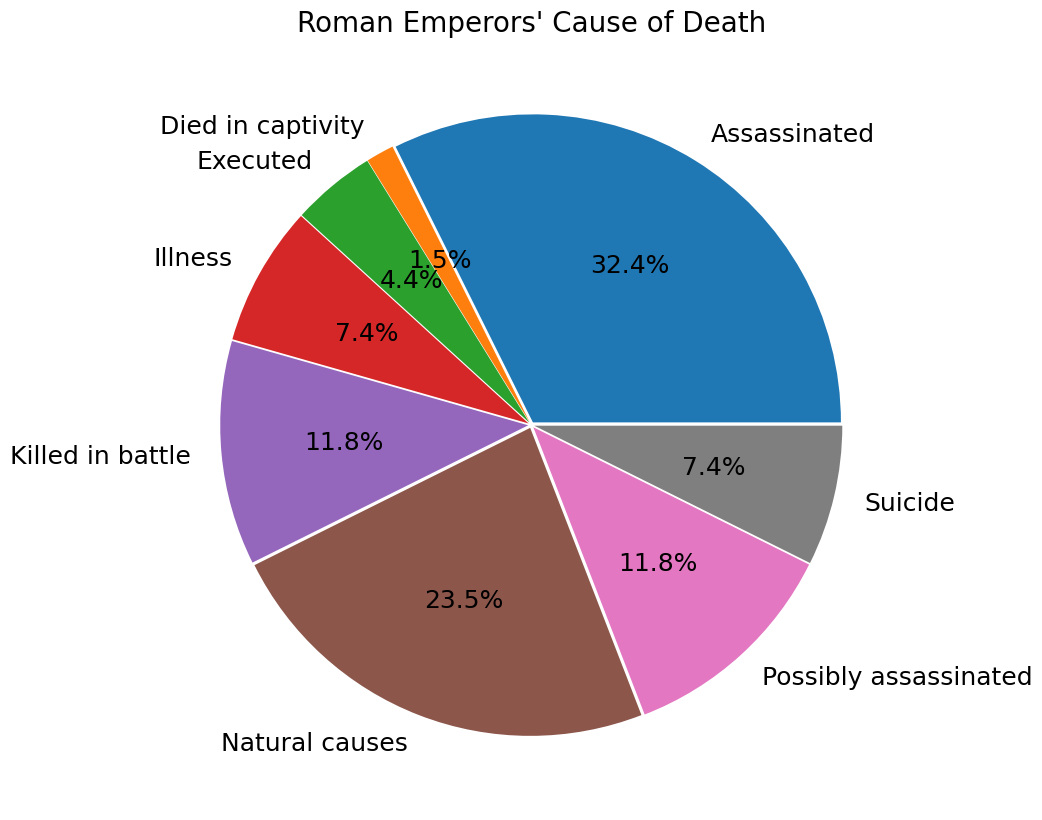

In [148]:
#Set size for the pie chart
plt.rcParams["figure.figsize"] = [12, 10]

#Plotting pie chart
plt.title("Roman Emperors' Cause of Death", fontsize = 20)
deathcause.plot.pie(autopct="%0.1f%%", fontsize = 18, ylabel = '',explode=[0.01]*8)


# Question 10


Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.Don't forget to label your axes!Color each dot according to its year

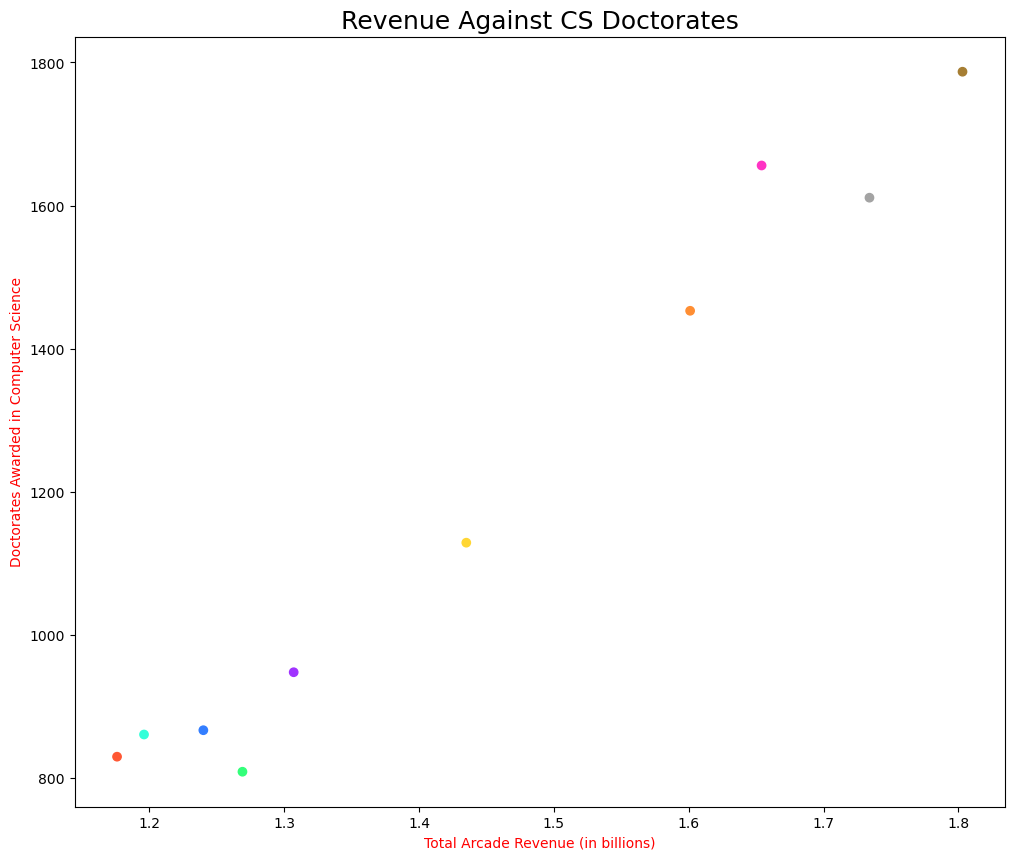

In [153]:
#Reference:https://www.w3schools.com/python/matplotlib_scatter.asp
#Imporing libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset from link
df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Colors in hexadecimal format
clr = ['#33FFD9', '#FF5733', '#33FF7A', '#337EFF', '#A033FF', '#FFD633', '#FF8E33', '#FF33C4', '#A67E33', '#A3A3A3']

# Scatter chart plotting
plt.scatter(x=df['Total Arcade Revenue (billions)'], y=df['Computer Science Doctorates Awarded (US)'], c=clr)

# Chart Title
plt.title('Revenue Against CS Doctorates', fontsize=18)

# x and y axis labels and color
plt.xlabel('Total Arcade Revenue (in billions)', color='r')
plt.ylabel('Doctorates Awarded in Computer Science', color='r')

# Show the plot
plt.show()